In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [7]:
df_penetracion_hogares=pd.read_excel(r"C:\Users\jessi\Desktop\PI Henry 2\Datasets\Internet.xlsx",sheet_name="Penetracion-hogares")

KPI: Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. 

A continuación se realizará una proyección sobre los hogares con acceso a internet cada 100 hogares para el próximo trimestre. También muestra en la última columna con True o False si se llega a cumplir o no el objetivo en función de la proyección.
Este KPI ayuda a medir el rendimiento de la empresa en su esfuerzo por expandir el acceso a internet, proporcionando un objetivo claro para orientar las estrategias y acciones de la empresa. Además, al ser un indicador clave de rendimiento, permite a la empresa evaluar su éxito en el logro de sus objetivos estratégicos y tomar decisiones informadas basadas en datos concretos.El incremento del 2% es cuantificable y permite realizar un seguimiento preciso del progreso.


In [8]:
df_penetracion_hogares['AnioTrimestre'] = df_penetracion_hogares['Año'].astype(str) + 'T' + df_penetracion_hogares['Trimestre'].astype(str)

df_penetracion_hogares['Trimestre_Num'] = pd.factorize(df_penetracion_hogares['AnioTrimestre'])[0] + 1

proyecciones = []

for provincia in df_penetracion_hogares['Provincia'].unique():
    df_provincia_historica = df_penetracion_hogares[df_penetracion_hogares['Provincia'] == provincia]

    if len(df_provincia_historica) >= 3:
        df_provincia_historica = df_provincia_historica.sort_values('Trimestre_Num')
        X = df_provincia_historica['Trimestre_Num'].values.reshape(-1, 1)
        y = df_provincia_historica['Accesos por cada 100 hogares'].values
        modelo = LinearRegression()
        modelo.fit(X, y)
        
        proximo_trimestre = X.max() + 1
        proyeccion = modelo.predict(np.array([[proximo_trimestre]]))
        
        proyecciones.append({
            'Provincia': provincia,
            'Proyeccion_Acceso': proyeccion[0],
            'Acceso_actual': y[-1]
        })

df_proyecciones = pd.DataFrame(proyecciones)

df_proyecciones['Nuevo_acceso'] = df_proyecciones['Acceso_actual'] * 1.02

df_proyecciones['KPI'] = ((df_proyecciones['Nuevo_acceso'] - df_proyecciones['Acceso_actual']) / df_proyecciones['Acceso_actual']) * 100

df_proyecciones['Cumple_Objetivo'] = df_proyecciones['Proyeccion_Acceso'] >= df_proyecciones['Nuevo_acceso']

df_proyecciones

,Provincia,Proyeccion_Acceso,Acceso_actual,Nuevo_acceso,KPI,Cumple_Objetivo
0,Buenos Aires,51.433036,54.570073,55.661474,2.0,False
1,Capital Federal,114.477562,112.254123,114.499205,2.0,False
2,Catamarca,14.129263,24.251751,24.736786,2.0,False
3,Chaco,21.336272,20.718539,21.132910,2.0,True
4,Chubut,25.719380,41.235218,42.059922,2.0,False
5,Córdoba,47.188045,52.517848,53.568204,2.0,False
6,Corrientes,21.778043,22.316717,22.763051,2.0,False
7,Entre Ríos,35.373693,34.367122,35.054464,2.0,True
8,Formosa,13.834935,17.418451,17.766820,2.0,False
9,Jujuy,10.704680,18.415352,18.783659,2.0,False


In [15]:
df_accesos_totalidad=pd.read_excel(r"C:\Users\jessi\Desktop\PI Henry 2\Datasets\Internet.xlsx",sheet_name="Accesos por velocidad")

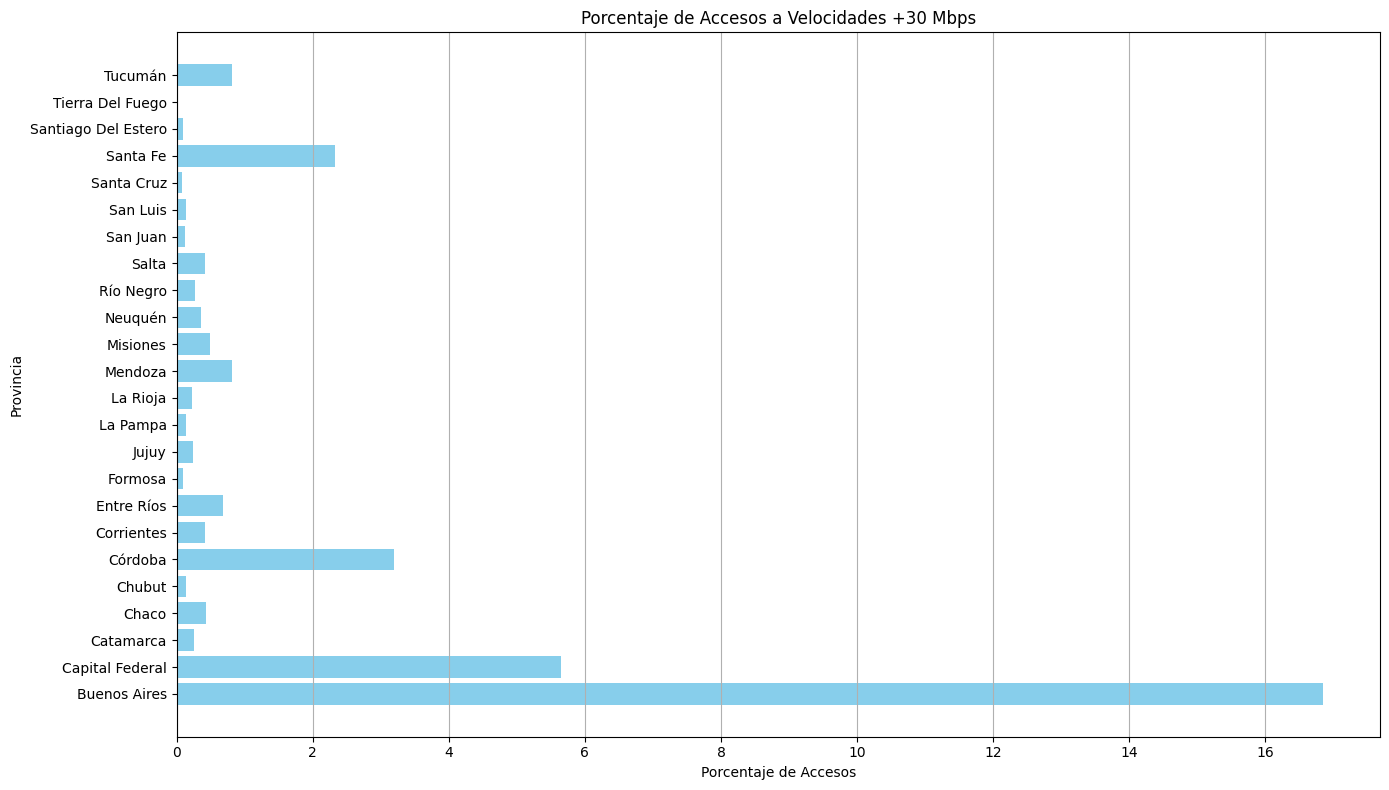

In [16]:
ultimo_trimestre = df_accesos_totalidad['Trimestre'].max()
ultimo_ano = df_accesos_totalidad['Año'].max()

df_filtrado = df_accesos_totalidad[
    ((df_accesos_totalidad['Año'] == ultimo_ano) & (df_accesos_totalidad['Trimestre'] <= ultimo_trimestre)) |
    ((df_accesos_totalidad['Año'] == (ultimo_ano - 1)) & (df_accesos_totalidad['Trimestre'] > (ultimo_trimestre - 3)))
]

total_accesos_ultimos_tres_trimestres = df_filtrado['+ 30 Mbps'].sum()

df_accesos_totalidad['Porcentaje'] = (df_accesos_totalidad['+ 30 Mbps'] / total_accesos_ultimos_tres_trimestres) * 100

plt.figure(figsize=(14, 8))
plt.barh(df_accesos_totalidad['Provincia'], df_accesos_totalidad['Porcentaje'], color='skyblue')
plt.xlabel('Porcentaje de Accesos')
plt.ylabel('Provincia')
plt.title('Porcentaje de Accesos a Velocidades +30 Mbps')
plt.grid(axis='x')

plt.tight_layout()
plt.show()


En el gráfico de arriba vemos que la velocidad de +30 Mbps está ampliamente utilizada en Buenos Aires y Capital Federal aunque no en otras provincias. Por ese motivo un KPI posible es "aumentar la velocidad de los accesos a velocidades a mas de + 30 Mbps en las provincias".Este KPI puede ayudar a medir y gestionar el progreso hacia objetivos estratégicos relacionados con la mejora de la calidad del servicio de internet en diferentes regiones. Busca mejorar la velocidad y calidad del acceso a internet en diversas provincias.


In [ ]:
df_accesos_tec_totales=pd.read_excel(r"C:\Users\jessi\Desktop\PI Henry 2\Datasets\Internet.xlsx",sheet_name="Totales Accesos Por Tecnología")

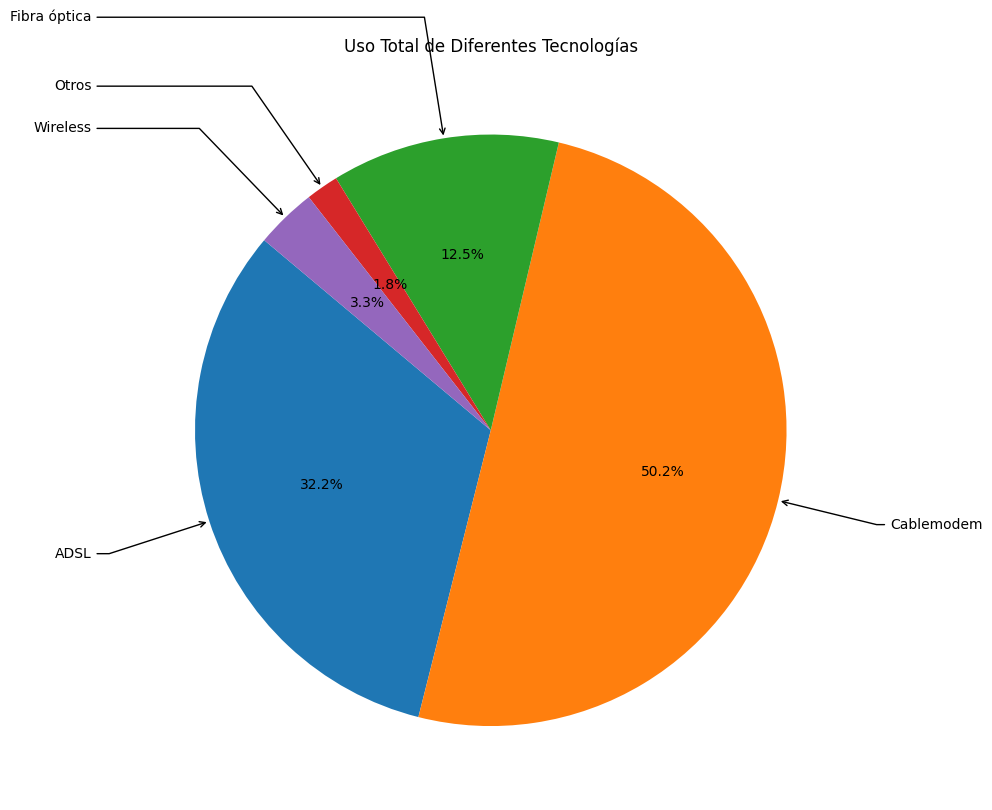

In [ ]:
tecnologias_columns = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Otros', 'Wireless']
df_tecnologias = df_accesos_tec_totales[tecnologias_columns]

total_accesos_tecnologias = df_tecnologias.sum()

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(total_accesos_tecnologias, autopct='%1.1f%%', startangle=140)

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)
    plt.annotate(total_accesos_tecnologias.index[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))

plt.title('Uso Total de Diferentes Tecnologías')
plt.tight_layout()
plt.show()

"Aumentar el acceso a fibra óptica" puede ser un KPI efectivo y relevante. Puede ayudar a medir y gestionar el progreso hacia objetivos estratégicos relacionados con la mejora de la infraestructura de telecomunicaciones y la calidad del servicio de internet. El indicador será el número de nuevos accesos a internet por fibra óptica que se detalla en el gráfico circular.
